In [1]:
import tensorflow as tf
from skimage.util.montage import montage2d
import matplotlib.pyplot as plt
%matplotlib inline
m = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=m.load_data()

In [2]:
print('x_train shape{}\nx_test shape{}\ny_train shape{}\ny_test shape{}'.format((x_train.shape),(x_test.shape),(y_train.shape),(y_test.shape)))

x_train shape(60000, 28, 28)
x_test shape(10000, 28, 28)
y_train shape(60000,)
y_test shape(10000,)


In [4]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
print(x_train.ndim)
print(y_train.ndim)
print(x_test.ndim)
print(y_test.ndim)

3
1
3
1


In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
nb_classes=10

In [8]:
from keras.utils import np_utils

Using TensorFlow backend.


In [27]:
len(y_test)

10000

In [28]:
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [38]:
print(y_test.shape,y_train.shape)

(10000, 10) (60000, 10)


In [43]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [44]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                     

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [46]:
model.fit(x_train, y_train,batch_size=128, epochs=3,verbose=1)

Epoch 1/3
60000/60000 [==============================] - 9s 158us/step - loss: 1.0728 - acc: 0.6543
Epoch 2/3
60000/60000 [==============================] - 9s 153us/step - loss: 0.4730 - acc: 0.8578
Epoch 3/3
60000/60000 [==============================] - 9s 154us/step - loss: 0.3694 - acc: 0.8906


In [47]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 73us/step
Test score: 0.3007842762827873
Test accuracy: 0.9135


In [1061]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == np.argmax(y_test))[0]
incorrect_indices = np.nonzero(predicted_classes != np.argmax(y_test))[0]

In [1062]:
correct_indices = np.nonzero(predicted_classes == np.argmax(y_test))[0]

In [1064]:
plt.rcParams['figure.figsize'] = (7,7)

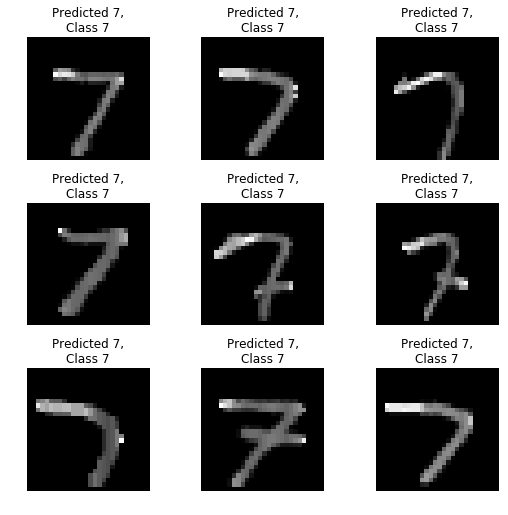

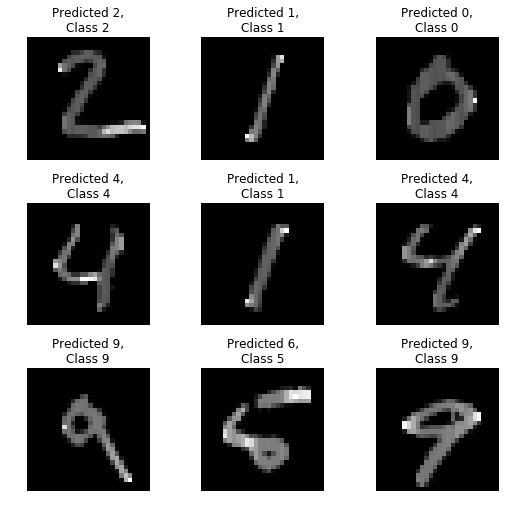

In [1065]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    plt.title("Predicted {},\nClass {}"
              .format(predicted_classes[correct], np.argmax(y_test[correct])))
    plt.axis('off')
    
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    plt.axis('off')
    plt.title("Predicted {},\nClass {}"
              .format(predicted_classes[incorrect], np.argmax(y_test[incorrect])))

In [ ]:
#imaprting a nice white bright image to the test set

In [1066]:
(x_train,y_train),(x_test,y_test)=m.load_data()

In [1067]:
x_test_per=x_test
y_test_per=y_test

In [1069]:
for i in range(len(x_test_per)):
    x_test_per[i][4][3]=255

In [1072]:
Image.fromarray(x_test_per[10])

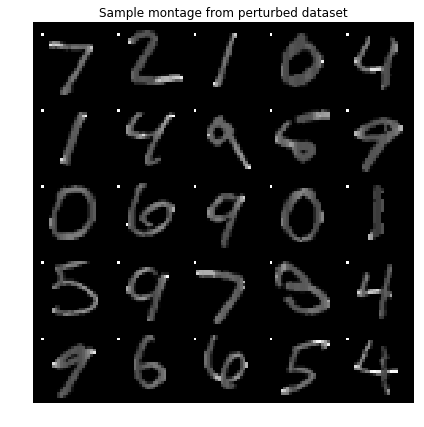

In [1073]:
x_test_per=tf.keras.utils.normalize(x_test_per,axis=1)
montage=x_test_per[0:25]
montage_img=np.zeros([25,28,28])
for i in range(len(montage)) : 
        montage_img[i]=montage[i].reshape(28,28)
plt.imshow(montage2d(montage_img),cmap='gray')
plt.title('Sample montage from perturbed dataset')
plt.axis('off')
plt.show()

In [1074]:
print(x_test_per.shape)
print(y_test_per.shape)

(10000, 28, 28)
(10000,)


In [1075]:
x_test_per = x_test.reshape(10000, 784)

In [1080]:
x_test_per.shape

(10000, 784)

In [1077]:
x_test_per = x_test_per.astype('float32')
x_test_per /= 255
y_test_per = np_utils.to_categorical(y_test, nb_classes)

In [1078]:
y_test_per.shape

(10000, 10)

In [1081]:
x_test_per=tf.keras.utils.normalize(x_test_per,axis=1)

In [1082]:
model.fit(x_test_per,y_test_per,epochs=3)

Epoch 1/3
10000/10000 [==============================] - 4s 398us/step - loss: 1.7923 - acc: 0.8754
Epoch 2/3
10000/10000 [==============================] - 4s 391us/step - loss: 1.3316 - acc: 0.9046
Epoch 3/3
10000/10000 [==============================] - 4s 389us/step - loss: 1.1803 - acc: 0.9126


In [1083]:
score = model.evaluate(x_test_per, y_test_per)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 76us/step
Test score: 1.0348504534036542
Test accuracy: 0.9238


In [1084]:
predicted_classes = model.predict_classes(x_test_per)

In [1085]:
correct_indices = np.nonzero(predicted_classes == np.argmax(y_test_per))[0]
incorrect_indices = np.nonzero(predicted_classes != np.argmax(y_test_per))[0]

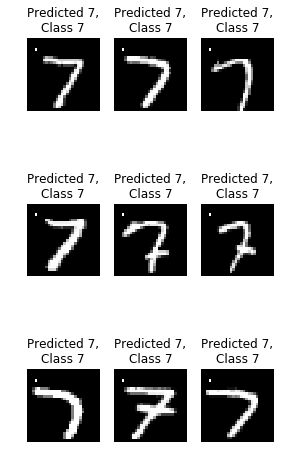

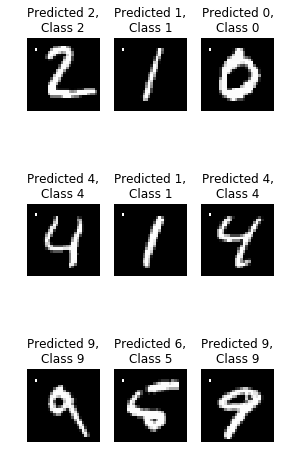

In [1087]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test_per[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.subplots_adjust(bottom=0, left=.01, right=.5, top=.9, hspace=.35)
    plt.title("Predicted {},\nClass {}"
              .format(predicted_classes[correct], np.argmax(y_test_per[correct])))
    plt.axis('off')
    
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test_per[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.subplots_adjust(bottom=0, left=.01, right=.5, top=.9, hspace=.35)
    plt.axis('off')
    plt.title("Predicted {},\nClass {}"
              .format(predicted_classes[incorrect], np.argmax(y_test_per[incorrect])))

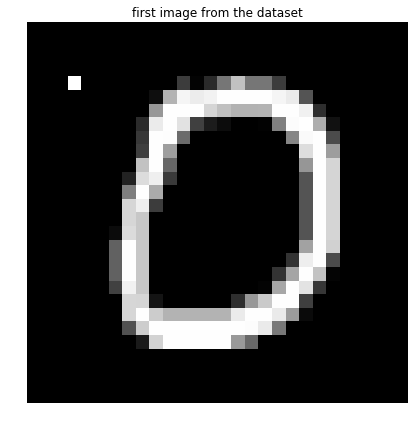

In [1088]:
sample=x_test_per[10].reshape(28,28) 
plt.imshow(sample ,cmap='gray')
plt.title('first image from the dataset')
plt.axis('off')
plt.show()